## Importing the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading of the Datasets

In [ ]:
train = pd.read_csv('Train.csv', parse_dates = ['Datetime'])
test = pd.read_csv('Test.csv',parse_dates = ['Datetime'])
SampleSubmission = pd.read_csv('SampleSubmission.csv')

## Visualization of the datasets

In [ ]:
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


In [ ]:
train.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


In [ ]:
train.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

In [ ]:
train.shape

(297177, 7)

In [ ]:
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 127361 non-null  object        
 1   Datetime           127361 non-null  datetime64[ns]
 2   Sensor1_PM2.5      127361 non-null  float64       
 3   Sensor2_PM2.5      127361 non-null  float64       
 4   Temperature        39271 non-null   float64       
 5   Relative_Humidity  39271 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.8+ MB


In [ ]:
test.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
count,127361.000000,127361.000000,39271.000000,39271.000000
mean,42.795356,43.958427,23.683838,72.215834
std,27.838730,28.260335,3.725563,18.078569
min,1.230000,0.780000,16.900000,28.000000
25%,24.670000,25.580000,20.900000,58.000000
50%,39.770000,39.880000,22.500000,78.000000
75%,52.030000,52.830000,26.500000,88.000000
max,927.780000,894.750000,34.000000,97.000000


In [ ]:
test.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity'],
      dtype='object')

In [ ]:
test.shape

(127361, 6)

In [ ]:
SampleSubmission.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,0


In [ ]:
train.shape, test.shape, SampleSubmission.shape

((297177, 7), (127361, 6), (127361, 2))

## Summarising Statistically

In [ ]:
train.describe(include='all')

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177,297177,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
unique,297177,293751,NaN,NaN,NaN,NaN,NaN
top,ID_F9GA1UFF3UVG,2021-12-06 02:28:52,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-10-15 16:00:31,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-01-21 07:34:57,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.751195,38.183018,23.316554,78.653623,0.371072
std,NaN,NaN,28.526182,28.647761,3.836971,14.772725,0.483092
min,NaN,NaN,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,NaN,NaN,22.430000,19.520000,20.400000,68.000000,0.000000


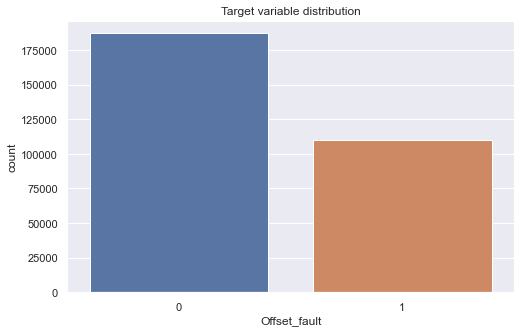

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["Offset_fault"])
plt.title('Target variable distribution')
plt.show()

## Checking for missing variables

In [ ]:
train.isnull().sum().any()

True

In [ ]:
test.isnull().sum().any()

True

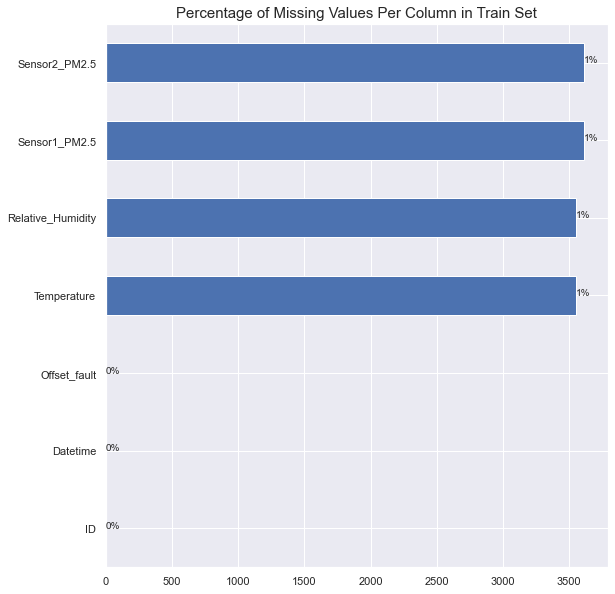

In [ ]:
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

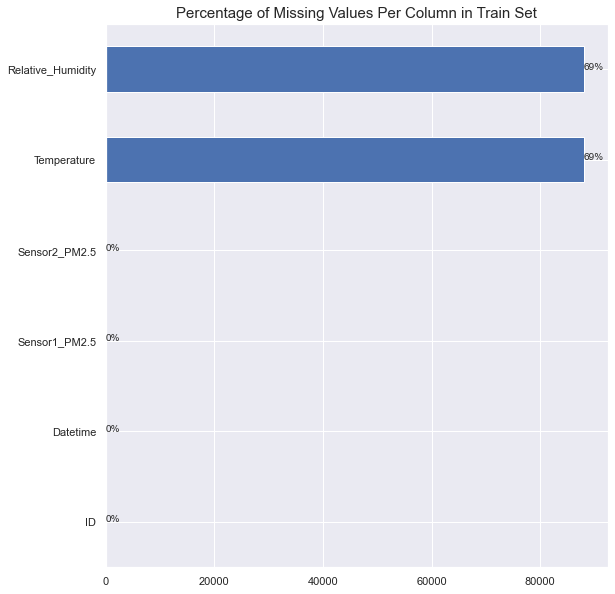

In [ ]:
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

## Outliers

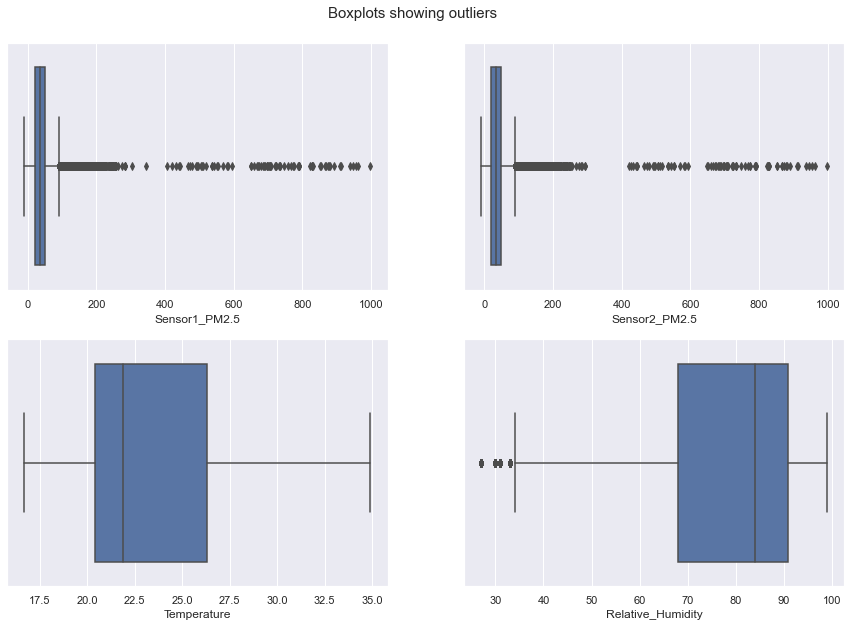

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Boxplots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity']):
  sns.boxplot(train[name], ax = ax)

#### I have to deal with this outliers to make my model a better one
#### Different approaches coming soon!!!

## Feature Enginnering

#### Extracting year, month, day and hour from the datetime feature column

In [1]:
train['Datetime_year'] = train.Datetime.dt.year
train['Datetime_month'] = train.Datetime.dt.month
train['Datetime_day'] = train.Datetime.dt.day
train['Datetime_hour'] = train.Datetime.dt.hour

NameError: ignored

In [ ]:
test['Datetime_year'] = test.Datetime.dt.year
test['Datetime_month'] = test.Datetime.dt.month
test['Datetime_day'] = test.Datetime.dt.day
test['Datetime_hour'] = test.Datetime.dt.hour

## EDA for the date features

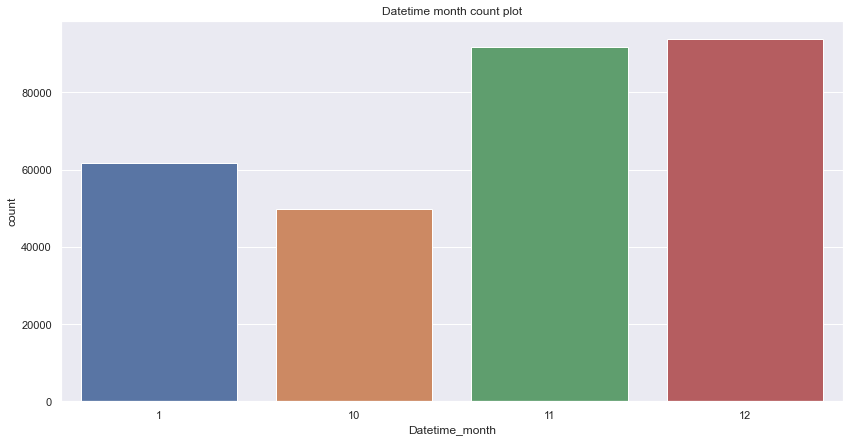

In [ ]:
plt.figure(figsize = (14, 7))
sns.countplot(x = 'Datetime_month', data = train)
plt.title('Datetime month count plot')
plt.show()

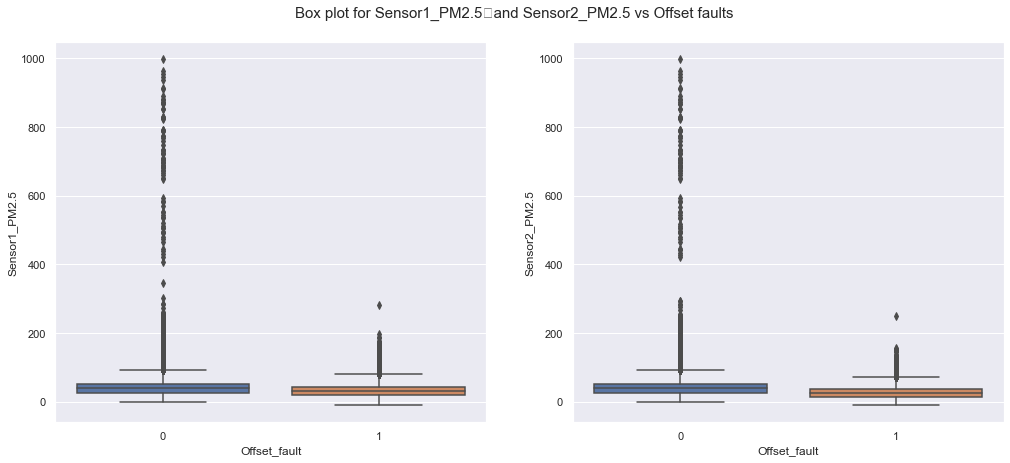

In [ ]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 7))
fig.suptitle('Box plot for Sensor1_PM2.5	and Sensor2_PM2.5 vs Offset faults', y= 0.95, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, ['Sensor1_PM2.5', 'Sensor2_PM2.5']):
  sns.boxplot(train.Offset_fault, train[name], ax= ax)

<Figure size 1440x864 with 0 Axes>

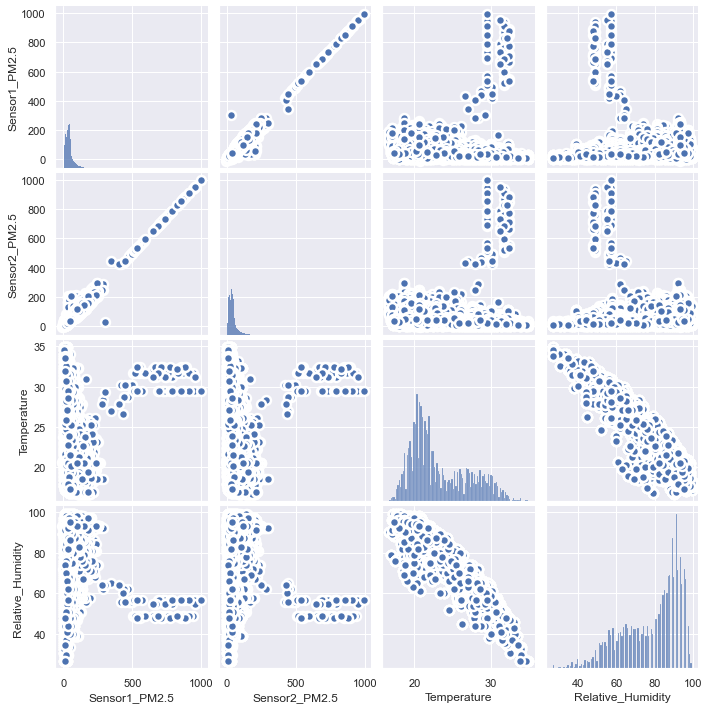

In [ ]:
plt.figure(figsize = (20, 12))
num_cols = ['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity']
sns.pairplot(train[num_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

#### There is a positive corellation between Sensor1_PM2.5 and Sensor2_PM2.5
#### But no corellation is observed between Temperature and Relative Humidity

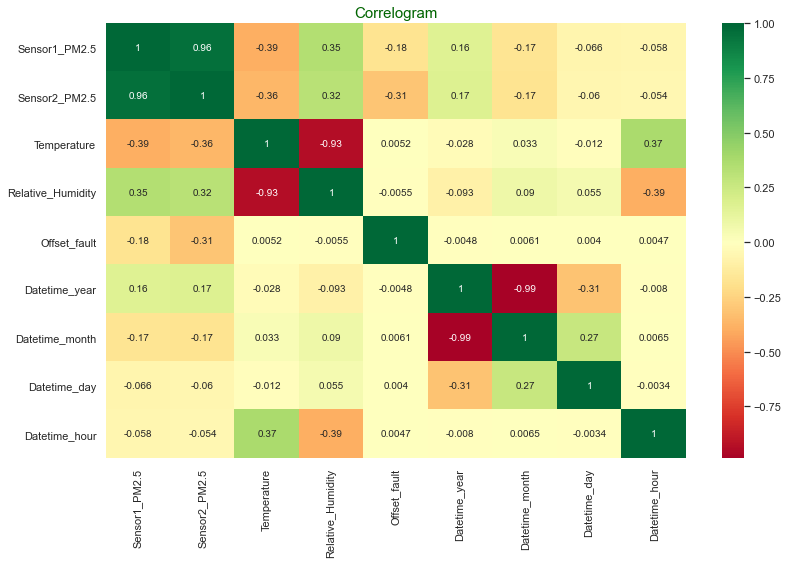

In [ ]:
corr = train.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

#### The Correlogram just showed the above observation

## Check the datasets if ready to build a model

In [ ]:
train_usable = ['Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity',  'Datetime_year', 'Datetime_month',
       'Datetime_day', 'Datetime_hour']

## Modelling

In [ ]:
X = train[train_usable].fillna(1)
y = train['Offset_fault']
test=test.fillna(1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

## RandomForestClassifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
LRmodel = LogisticRegression(random_state=32)
LRmodel.fit(X_train,y_train)
LRpredictions= LRmodel.predict(X_test)

In [ ]:
print(f'Accuracy score: {accuracy_score(y_test,LRpredictions )}')
print('\n')
print(f'{classification_report(y_test, LRpredictions)}')

Accuracy score: 0.8964488413307311


              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56115
           1       0.85      0.87      0.86     33039

    accuracy                           0.90     89154
   macro avg       0.89      0.89      0.89     89154
weighted avg       0.90      0.90      0.90     89154



## Submission file

In [ ]:
test_predictions = test[train_usable]
predictions = LRmodel.predict(test_predictions)

In [ ]:
SampleSubmission.Offset_fault=predictions

In [ ]:
SampleSubmission.to_csv('Submission_LOGISTIC_REGRESSION.csv',index= False)